In [ ]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

>>Importação das bibliotecas

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA

from copy import copy
import os

#### Climate Weather Surface of Brazil

>>Carregamento do dataset

In [2]:
df = pd.read_csv("southeast.csv", nrows=10000)
df.head()

,index,Data,Hora,"PRECIPITAÇÃO TOTAL, HORÁRIO (mm)","PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)",PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB),PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB),RADIACAO GLOBAL (Kj/m²),"TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)",TEMPERATURA DO PONTO DE ORVALHO (°C),...,"VENTO, DIREÇÃO HORARIA (gr) (° (gr))","VENTO, RAJADA MAXIMA (m/s)","VENTO, VELOCIDADE HORARIA (m/s)",region,state,station,station_code,latitude,longitude,height
0,0,2000-05-07,00:00,-9999.0,-9999.0,-9999.0,-9999.0,-9999,-9999.0,-9999.0,...,-9999,-9999.0,-9999.0,SE,RJ,ECOLOGIA AGRICOLA,A601,-22.8,-43.683333,33.0
1,1,2000-05-07,01:00,-9999.0,-9999.0,-9999.0,-9999.0,-9999,-9999.0,-9999.0,...,-9999,-9999.0,-9999.0,SE,RJ,ECOLOGIA AGRICOLA,A601,-22.8,-43.683333,33.0
2,2,2000-05-07,02:00,-9999.0,-9999.0,-9999.0,-9999.0,-9999,-9999.0,-9999.0,...,-9999,-9999.0,-9999.0,SE,RJ,ECOLOGIA AGRICOLA,A601,-22.8,-43.683333,33.0
3,3,2000-05-07,03:00,-9999.0,-9999.0,-9999.0,-9999.0,-9999,-9999.0,-9999.0,...,-9999,-9999.0,-9999.0,SE,RJ,ECOLOGIA AGRICOLA,A601,-22.8,-43.683333,33.0
4,4,2000-05-07,04:00,-9999.0,-9999.0,-9999.0,-9999.0,-9999,-9999.0,-9999.0,...,-9999,-9999.0,-9999.0,SE,RJ,ECOLOGIA AGRICOLA,A601,-22.8,-43.683333,33.0


In [3]:
print("\nInformações sobre o dataset:")
df.info()


Informações sobre o dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 27 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   index                                                  10000 non-null  int64  
 1   Data                                                   10000 non-null  object 
 2   Hora                                                   10000 non-null  object 
 3   PRECIPITAÇÃO TOTAL, HORÁRIO (mm)                       10000 non-null  float64
 4   PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)  10000 non-null  float64
 5   PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB)        10000 non-null  float64
 6   PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB)       10000 non-null  float64
 7   RADIACAO GLOBAL (Kj/m²)                                10000 non-null  int64  
 8   TEMPERATURA DO AR

>>Análise e Tratamento inicial dos Dados

In [4]:
print("\nNúmero de valores ausentes em cada coluna:")
print(df.isnull().sum())


Número de valores ausentes em cada coluna:
index                                                    0
Data                                                     0
Hora                                                     0
PRECIPITAÇÃO TOTAL, HORÁRIO (mm)                         0
PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)    0
PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB)          0
PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB)         0
RADIACAO GLOBAL (Kj/m²)                                  0
TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)             0
TEMPERATURA DO PONTO DE ORVALHO (°C)                     0
TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C)               0
TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C)               0
TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C)         0
TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C)         0
UMIDADE REL. MAX. NA HORA ANT. (AUT) (%)                 0
UMIDADE REL. MIN. NA HORA ANT. (AUT) (%)                 0
UMIDADE RELA

In [5]:
linhas_ausentes = copy(df[df.isnull().any(axis=1)])
linhas_ausentes.head()

,index,Data,Hora,"PRECIPITAÇÃO TOTAL, HORÁRIO (mm)","PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)",PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB),PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB),RADIACAO GLOBAL (Kj/m²),"TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)",TEMPERATURA DO PONTO DE ORVALHO (°C),...,"VENTO, DIREÇÃO HORARIA (gr) (° (gr))","VENTO, RAJADA MAXIMA (m/s)","VENTO, VELOCIDADE HORARIA (m/s)",region,state,station,station_code,latitude,longitude,height


In [6]:
df = copy(df.dropna())

In [8]:
count_neg9999 = copy(df.isin([-9999]).any(axis=1).sum())
print(f"Número de linhas que contêm valores iguais a -9999 em qualquer coluna: {count_neg9999}")

Número de linhas que contêm valores iguais a -9999 em qualquer coluna: 5207


In [9]:
df_cleaned = copy(df[~df.isin([-9999]).any(axis=1)])


Distribuição de VENTO, RAJADA MAXIMA (m/s)


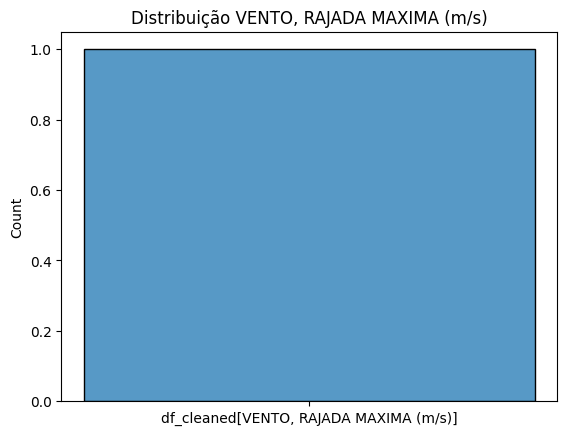

In [10]:
print("\nDistribuição de VENTO, RAJADA MAXIMA (m/s)")
sns.histplot("df_cleaned[VENTO, RAJADA MAXIMA (m/s)]")
plt.title("Distribuição VENTO, RAJADA MAXIMA (m/s)")
plt.show()

>>Seleção de Atributos
>>> Investigar a correlação com a coluna 'VENTO, VELOCIDADE HORARIA (m/s)'

In [11]:
df_numerical = copy(df_cleaned.select_dtypes(include=["float64", "int64"]))
df_numerical = copy(df_numerical.drop(columns=["index"], errors="ignore"))

In [12]:
if"VENTO, VELOCIDADE HORARIA (m/s)" in df_numerical.columns:
    print("\nCorrelação dos atributos numéricos com 'VENTO, VELOCIDADE HORARIA (m/s)':")
    correlation_with_vento = df_numerical.corr()["VENTO, VELOCIDADE HORARIA (m/s)"]
    print(correlation_with_vento)
    columns_above_threshold = correlation_with_vento[correlation_with_vento.abs() > 0.4].index
    df_filtered = df_numerical[columns_above_threshold]
else:
    print("A coluna 'VENTO, VELOCIDADE HORARIA (m/s)' não está presente no DataFrame.")


Correlação dos atributos numéricos com 'VENTO, VELOCIDADE HORARIA (m/s)':
PRECIPITAÇÃO TOTAL, HORÁRIO (mm)                        -0.023672
PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)    0.236616
PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB)          0.237508
PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB)         0.237315
RADIACAO GLOBAL (Kj/m²)                                  0.252812
TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)             0.134884
TEMPERATURA DO PONTO DE ORVALHO (°C)                     0.037882
TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C)               0.157447
TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C)               0.149569
TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C)         0.047625
TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C)         0.045459
UMIDADE REL. MAX. NA HORA ANT. (AUT) (%)                -0.151093
UMIDADE REL. MIN. NA HORA ANT. (AUT) (%)                -0.150600
UMIDADE RELATIVA DO AR, HORARIA (%)                     -0.131428
V

In [13]:
print("\nNovo DataFrame com colunas cujas correlações com 'VENTO, VELOCIDADE HORARIA (m/s)' são maiores que 0.4:")
df_filtered.sample(10)


Novo DataFrame com colunas cujas correlações com 'VENTO, VELOCIDADE HORARIA (m/s)' são maiores que 0.4:


,"VENTO, RAJADA MAXIMA (m/s)","VENTO, VELOCIDADE HORARIA (m/s)"
5658,5.6,3.3
2221,5.8,2.2
3677,4.2,2.2
587,3.0,1.5
1355,6.4,3.1
763,8.9,2.6
4750,4.4,0.8
7485,4.8,1.4
716,4.4,1.0
9524,6.0,3.5


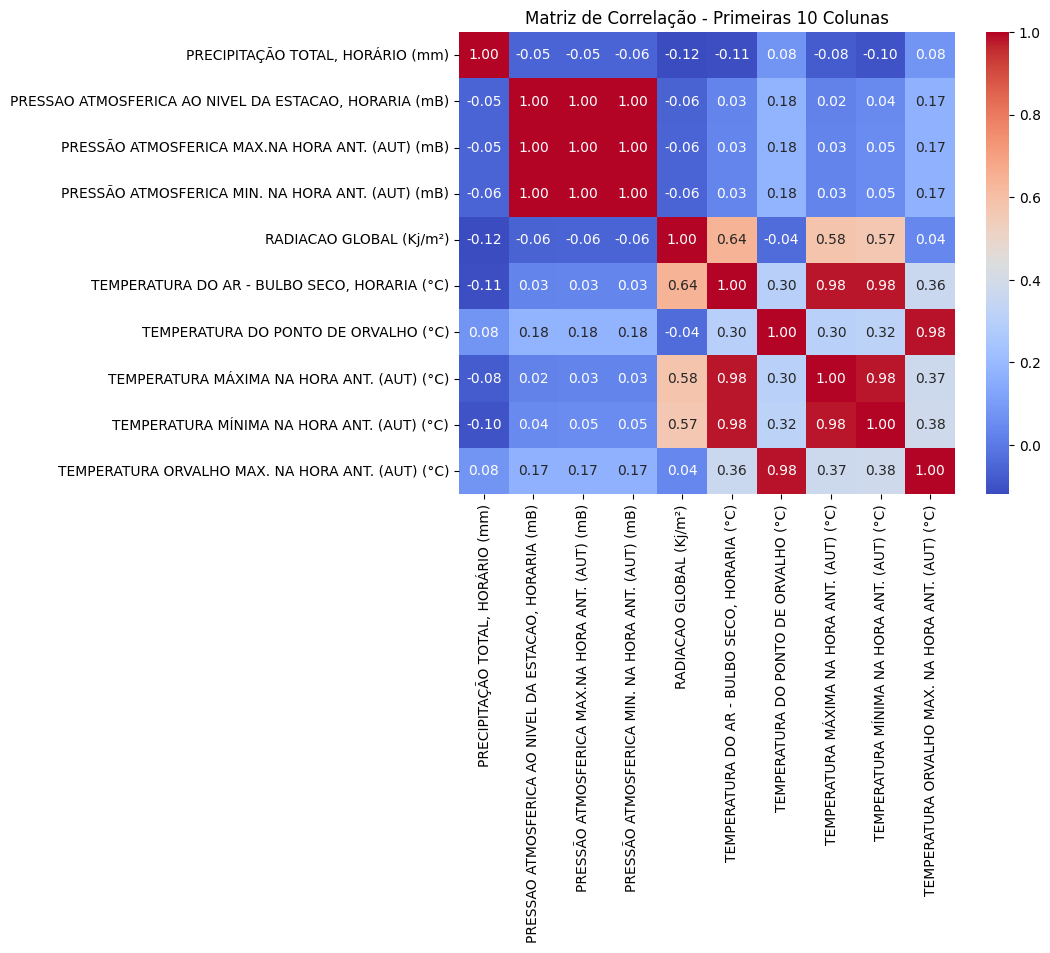

In [14]:
df_subset = df_numerical.iloc[:, :10]
plt.figure(figsize=(8, 6))
sns.heatmap(df_subset.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlação - Primeiras 10 Colunas")
plt.show()

>> Redutor de Dimensionalidade

Variância explicada por cada componente: [9.23127438e-01 6.76977989e-02 8.61006854e-03 4.61943109e-04
 6.84670908e-05 1.28873072e-05]
Variância total explicada: 0.9999786029467636


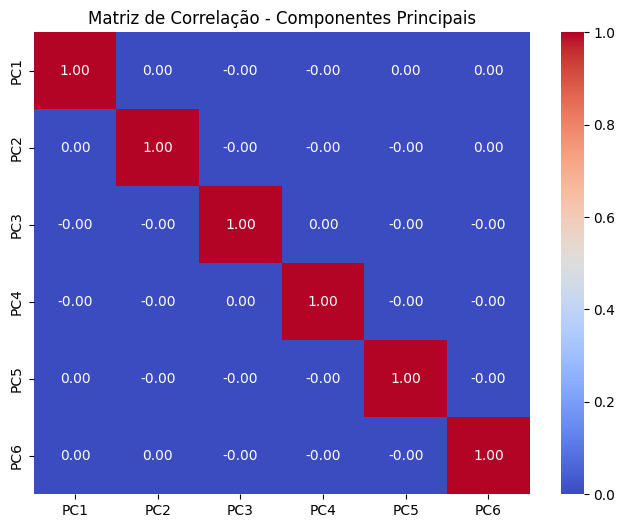

In [15]:
pca = PCA(n_components=6)  # Reduzindo para 6 componentes principais
df_numerical_pca = pca.fit_transform(df_numerical)

print("Variância explicada por cada componente:", pca.explained_variance_ratio_)
print("Variância total explicada:", np.sum(pca.explained_variance_ratio_))

n_components = df_numerical_pca.shape[1]
df_numerical_pca_df = pd.DataFrame(df_numerical_pca, columns=[f"PC{i+1}" for i in range(n_components)])
plt.figure(figsize=(8, 6))
sns.heatmap(df_numerical_pca_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlação - Componentes Principais")
plt.show()

#### Online Payments Fraud Detection

>>Target Encoding

In [16]:
df_finc = pd.read_csv("PS_20174392719_1491204439457_log.csv", nrows=10000)
df_finc.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [17]:
mean_encoded = df_finc.groupby("type")["newbalanceDest"].mean()
print(mean_encoded)

type
CASH_IN     2.505773e+06
CASH_OUT    2.369629e+06
DEBIT       6.231235e+05
PAYMENT     0.000000e+00
TRANSFER    2.972507e+06
Name: newbalanceDest, dtype: float64


In [18]:
df_finc["type_encoded"] = df_finc["type"].map(mean_encoded)
df_finc.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_encoded
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,0.000000e+00
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,0.000000e+00
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,2.972507e+06
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,2.369629e+06
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,0.000000e+00


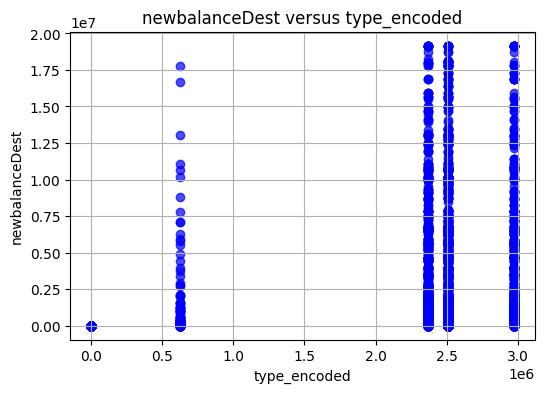

In [19]:
plt.figure(figsize=(6, 4))
plt.scatter(df_finc["type_encoded"], df_finc["newbalanceDest"], color="blue", alpha=0.7)
plt.title("newbalanceDest versus type_encoded")
plt.ylabel("newbalanceDest")
plt.xlabel("type_encoded")
plt.grid(True)
plt.show()

#### Exercícios

1. Pré-Processamento de Dados - Tratamento de Valores Ausentes e Inválidos

**Questão**: Considerando que alguns valores ausentes no dataset podem ser substituídos em vez de descartados, quais seriam as possíveis estratégias para substituir valores ausentes e valores inválidos (como -9999)? Implemente ao menos uma estratégia de substituição e compare os resultados com a remoção dos dados.  
**Objetivo**: Entender o impacto de diferentes abordagens de tratamento de dados ausentes no dataset


*Uma alternativa seria verificar o desvio padrão da variável em questão, e se o desvio for baixo, os valores ausentes/inválidos poderiam ser substituídos pela média (variáveis contínuas) e moda (variáveis discretas):*

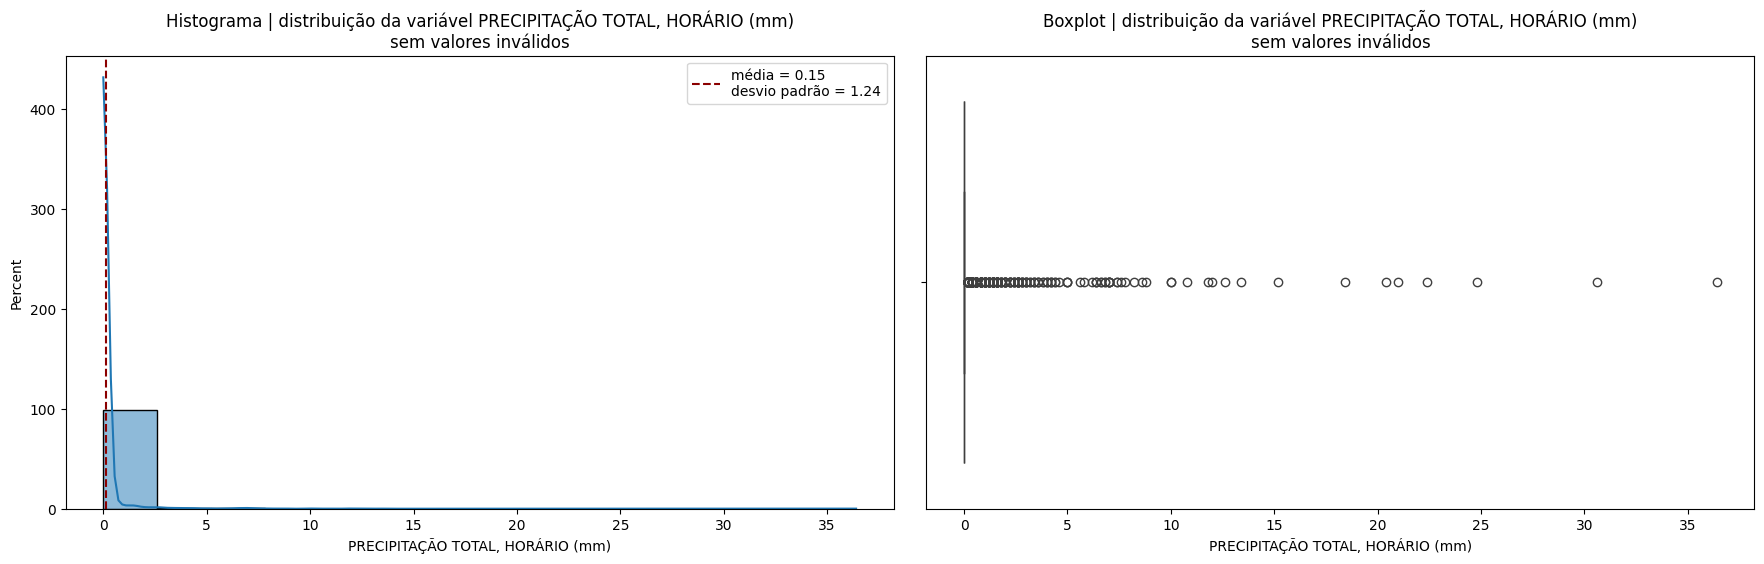

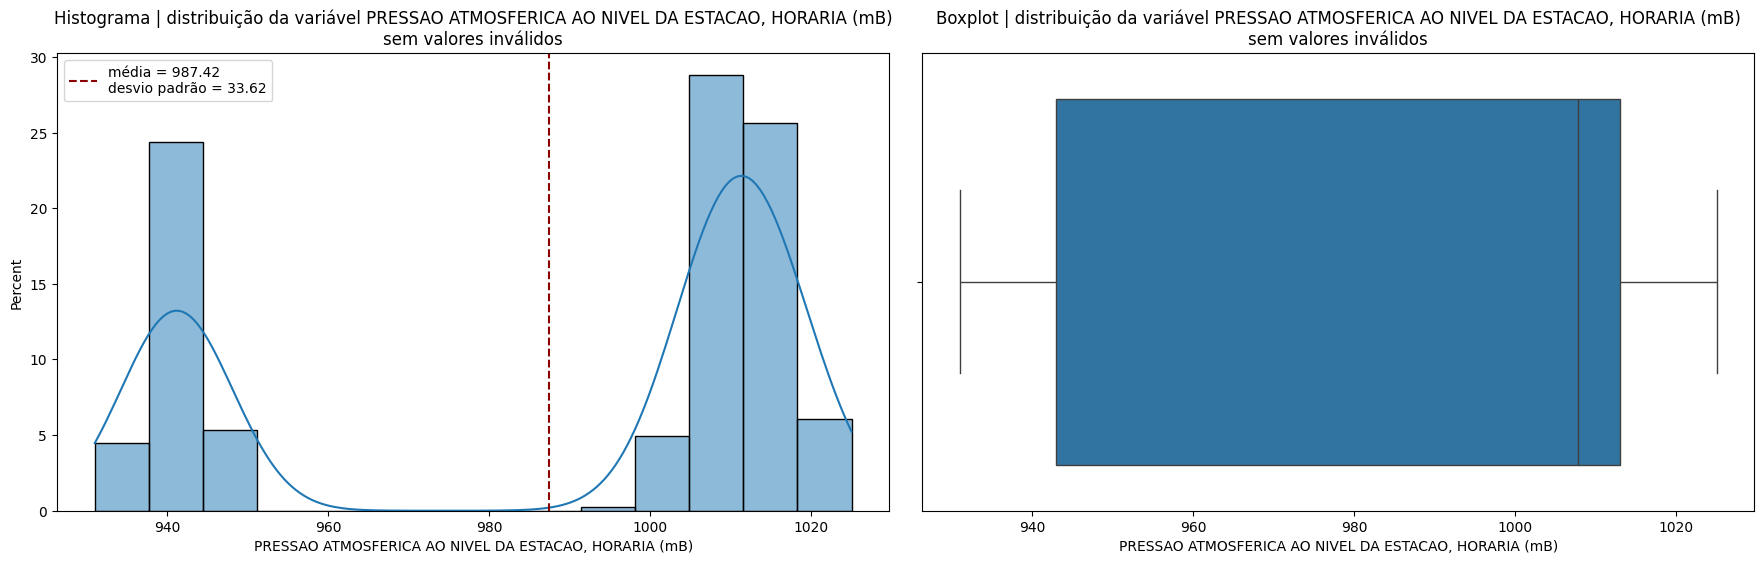

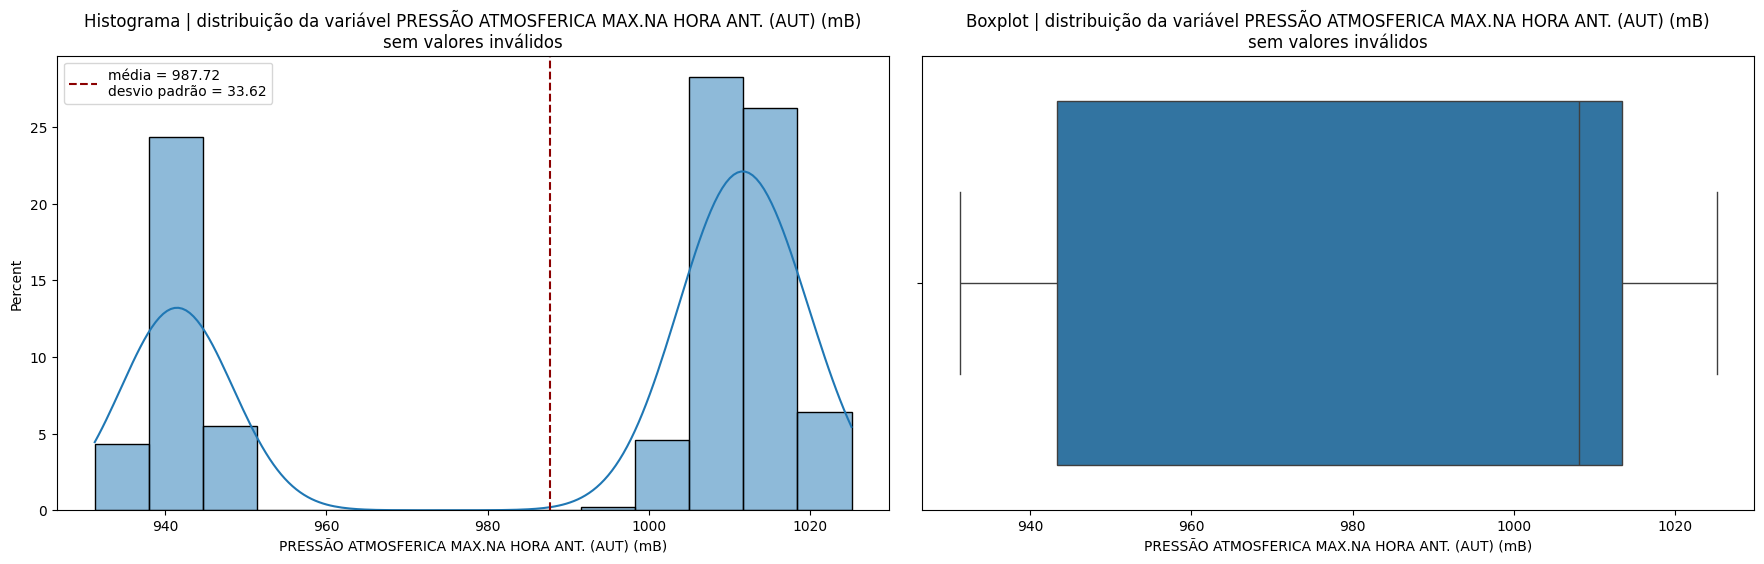

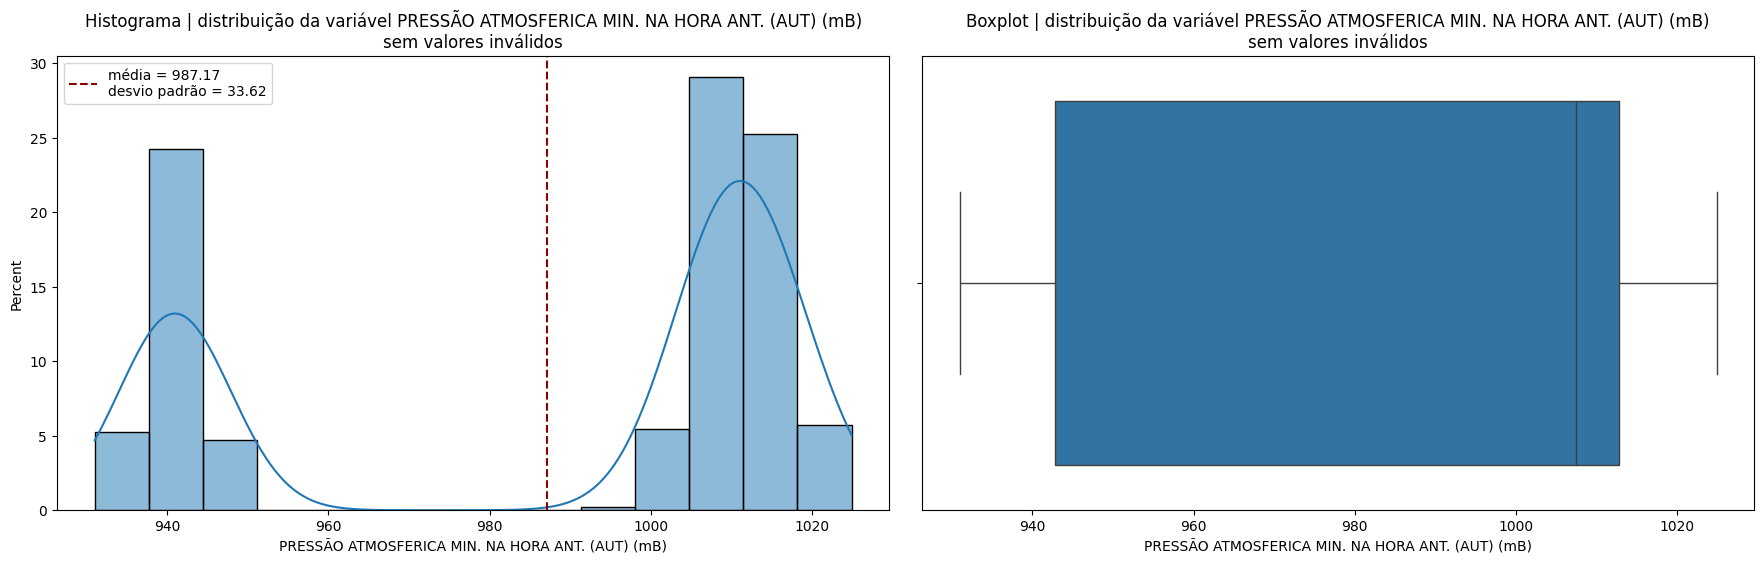

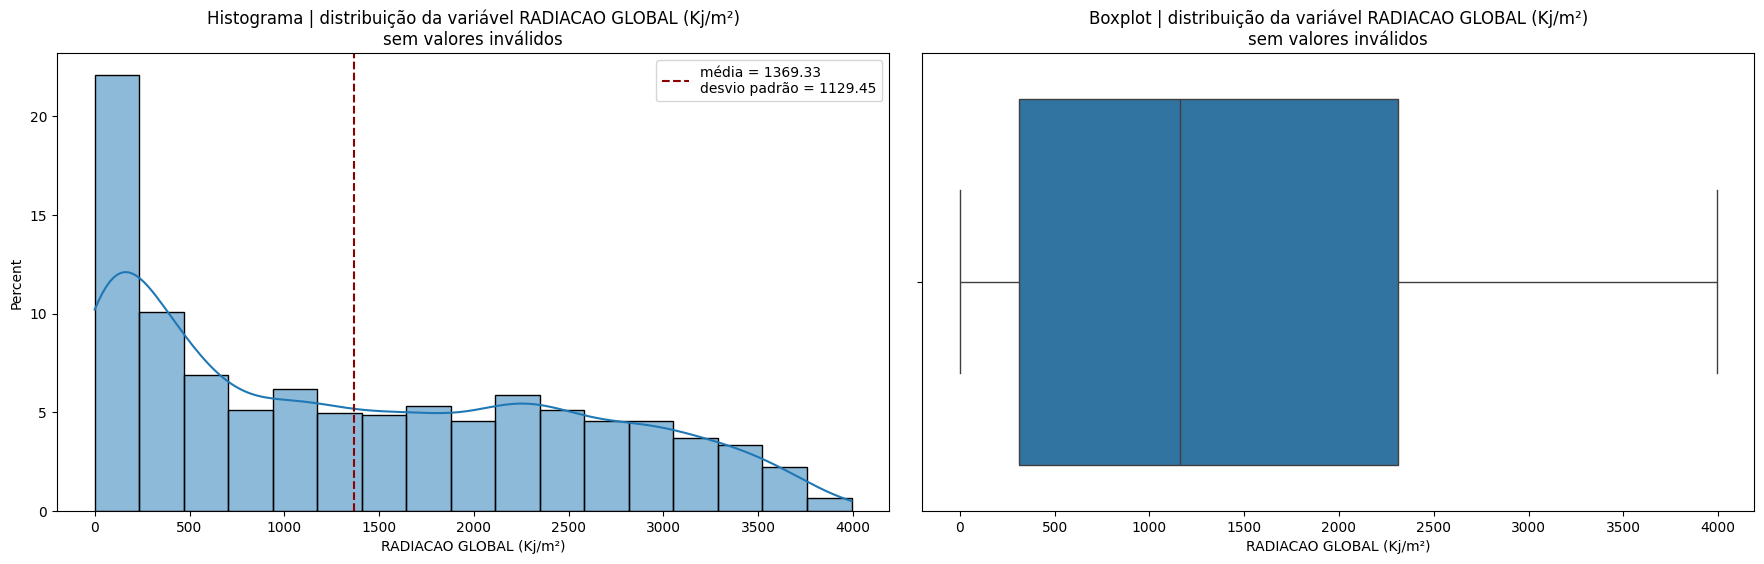

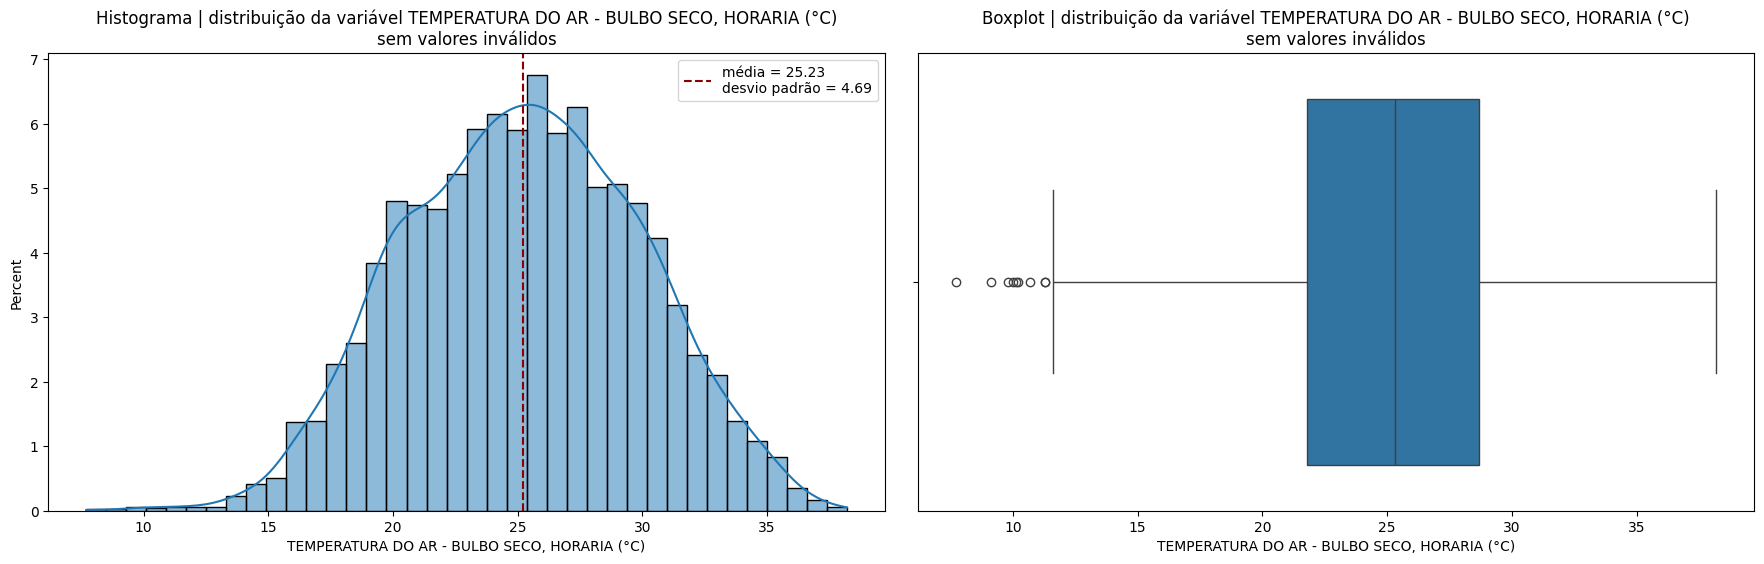

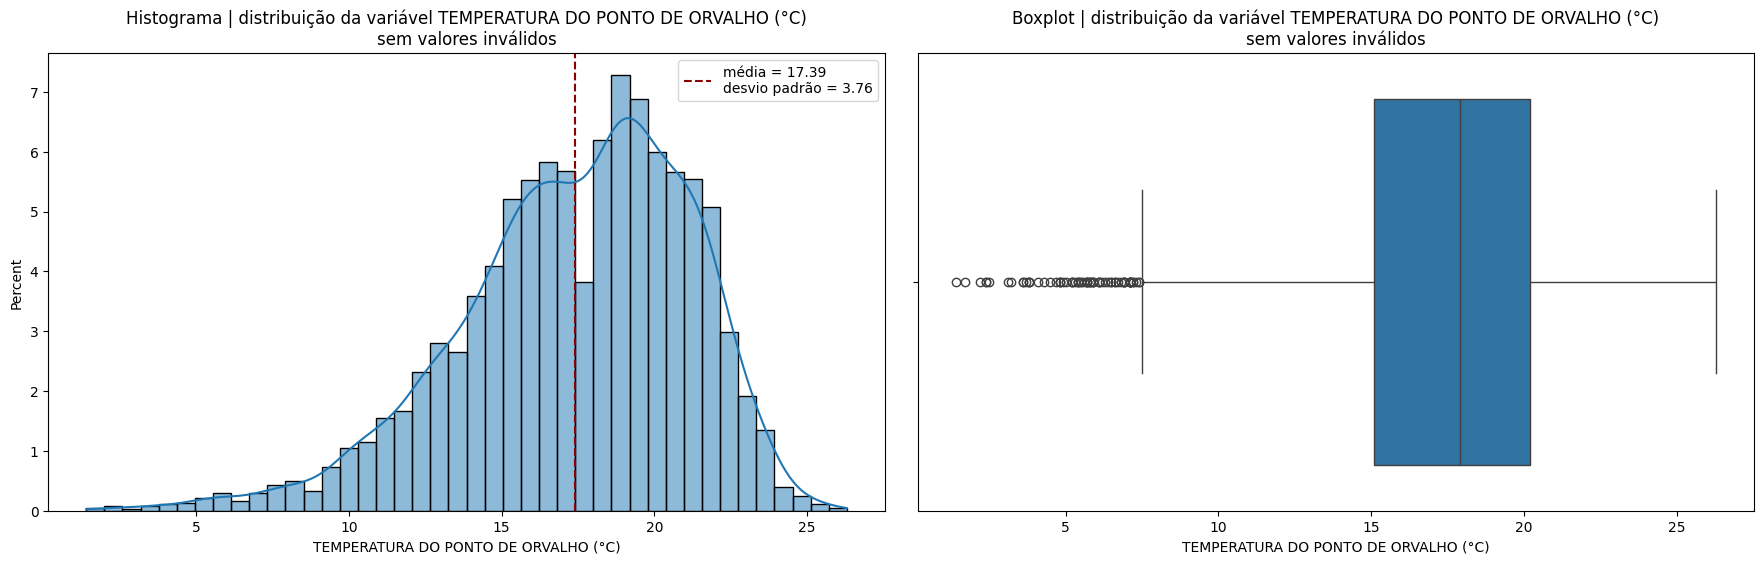

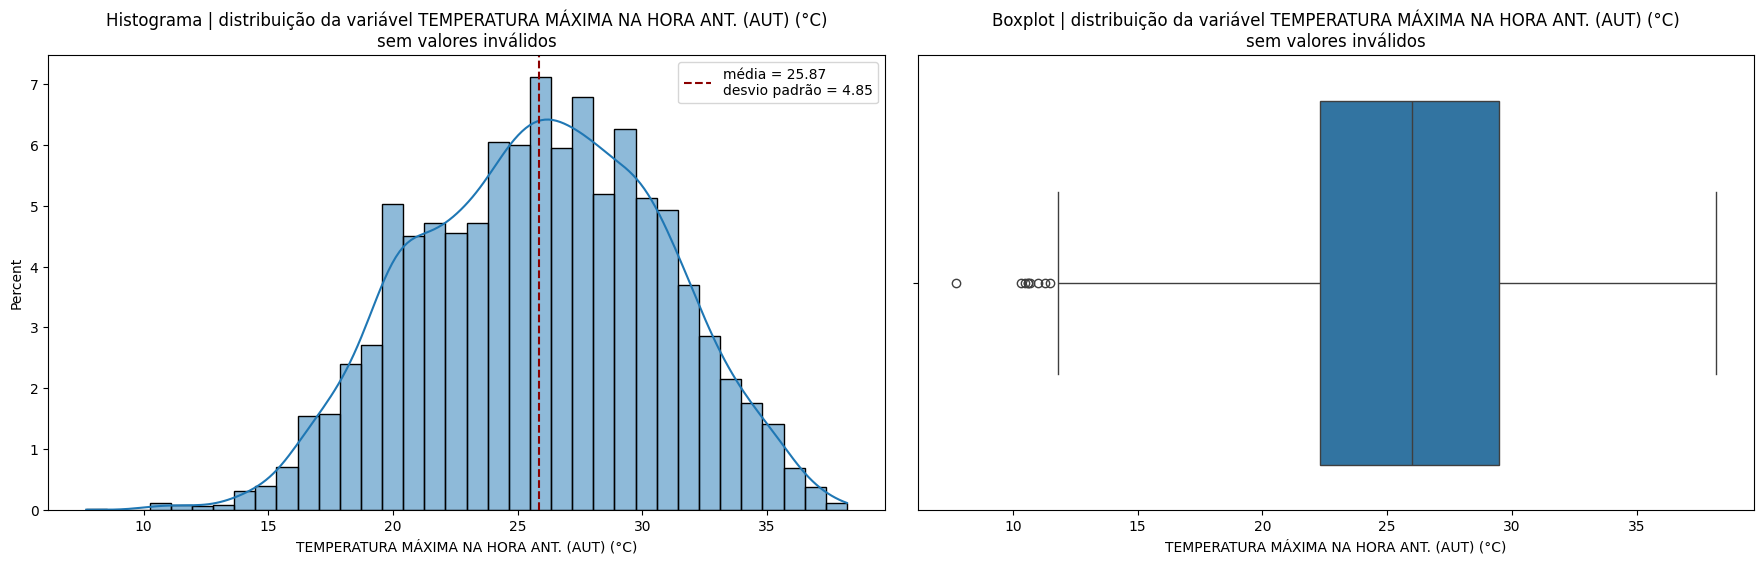

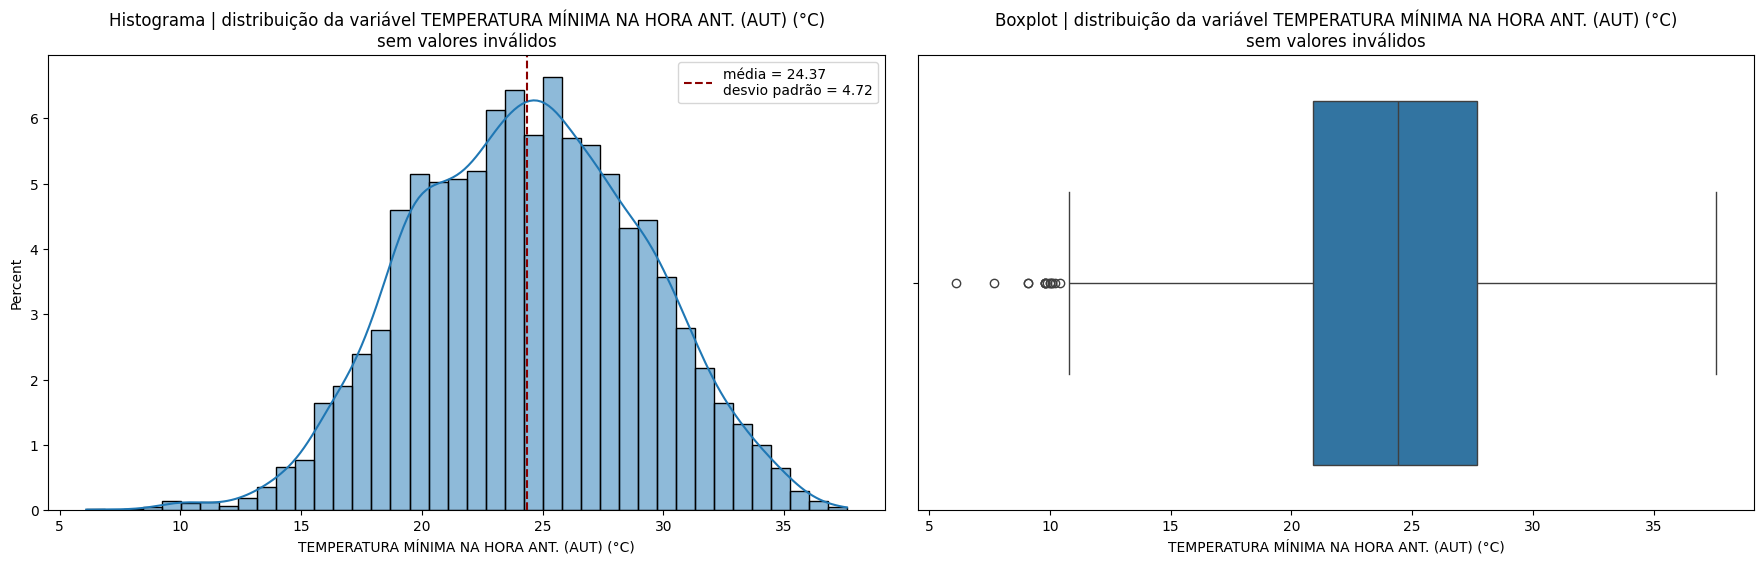

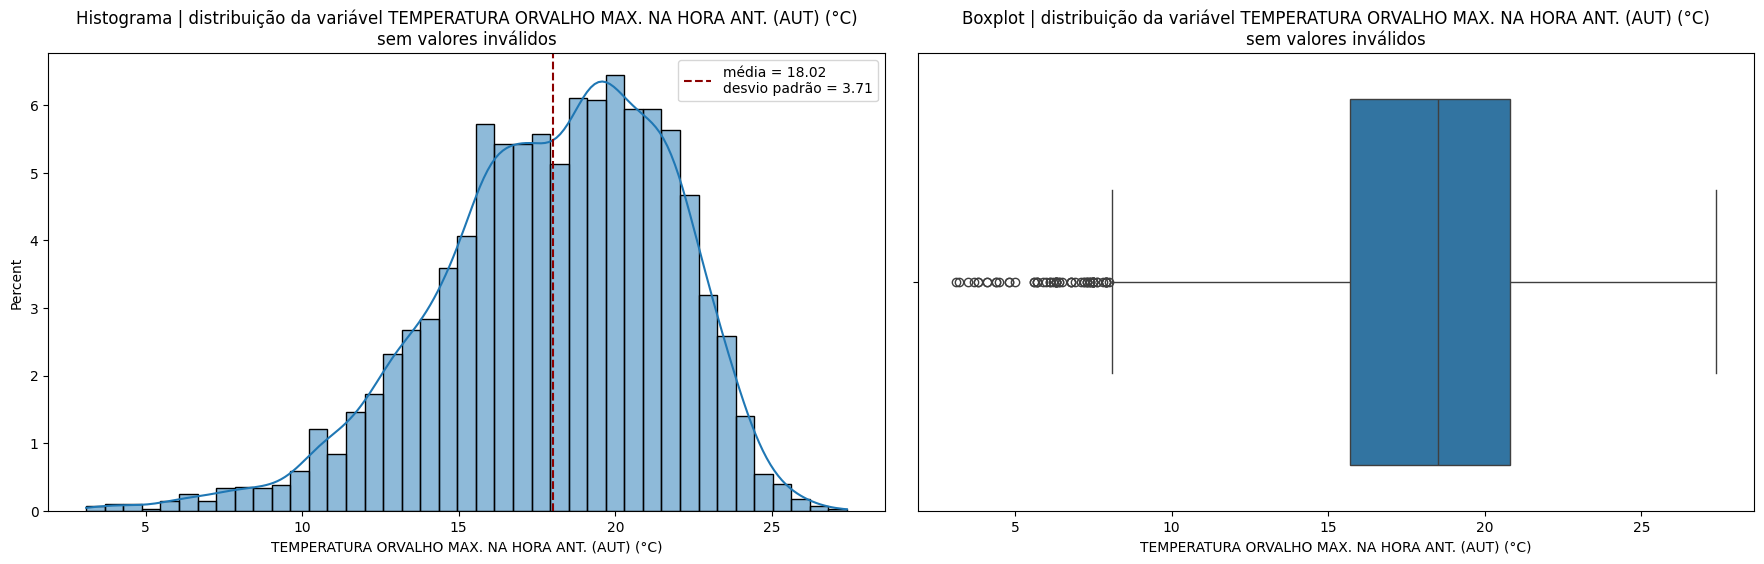

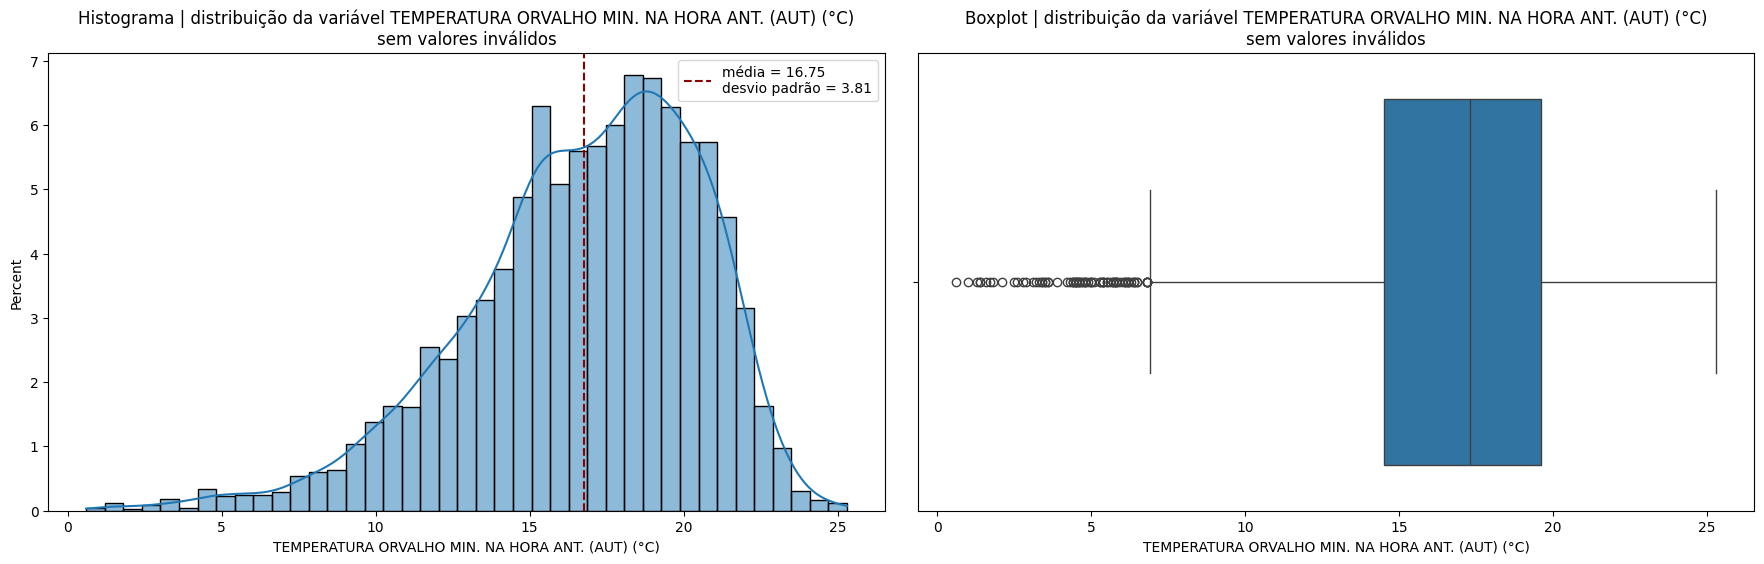

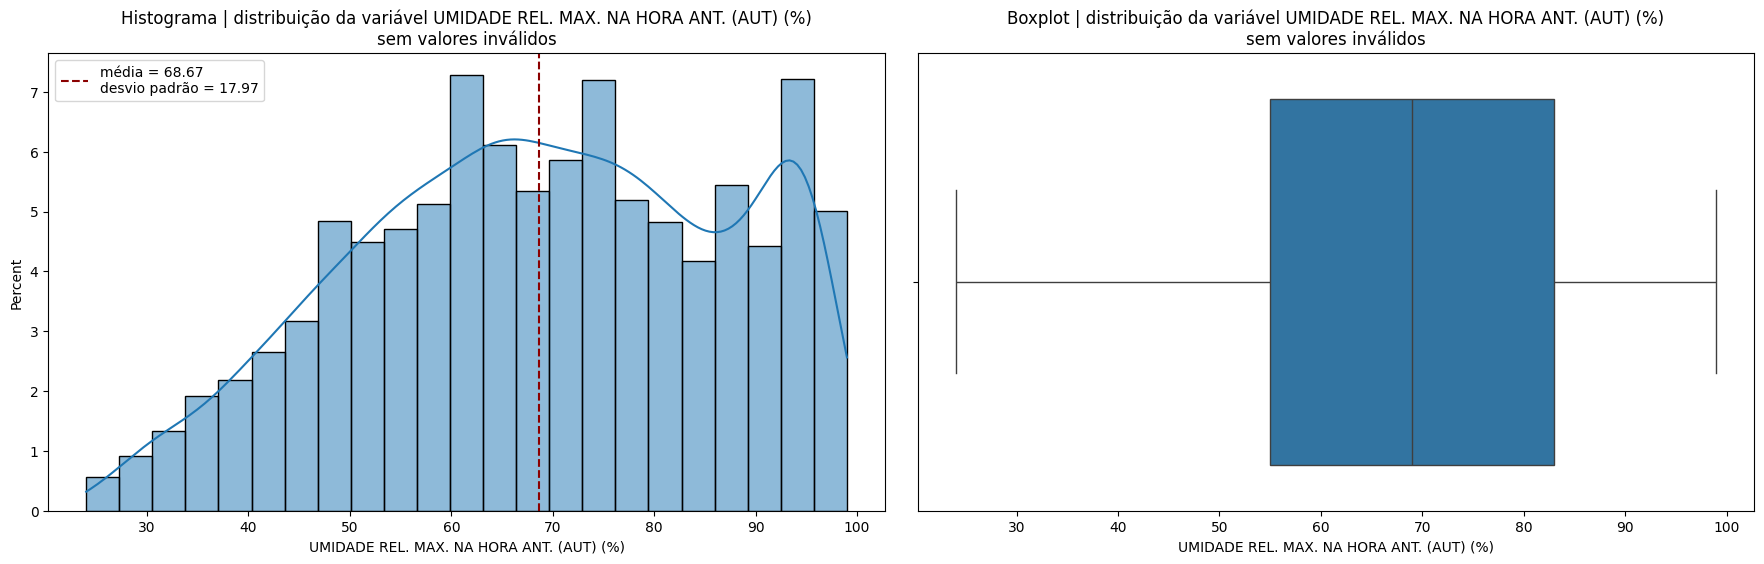

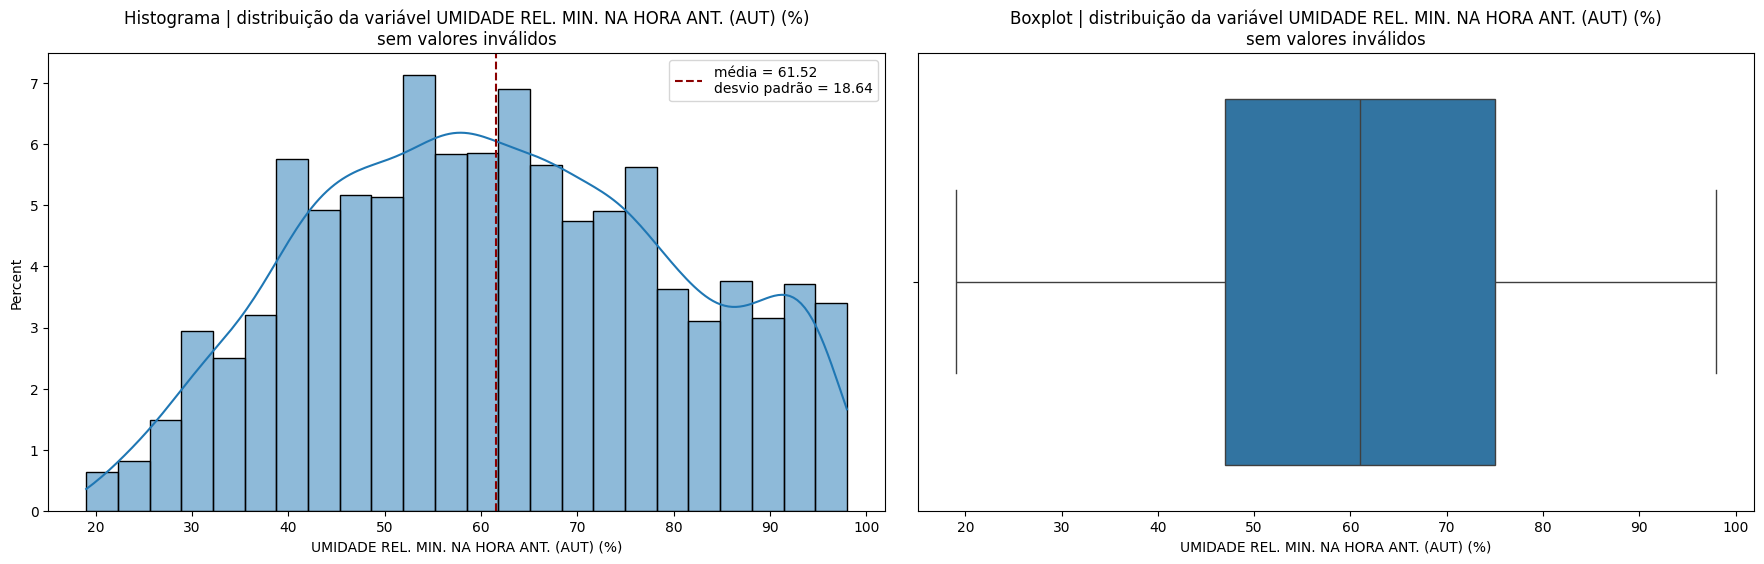

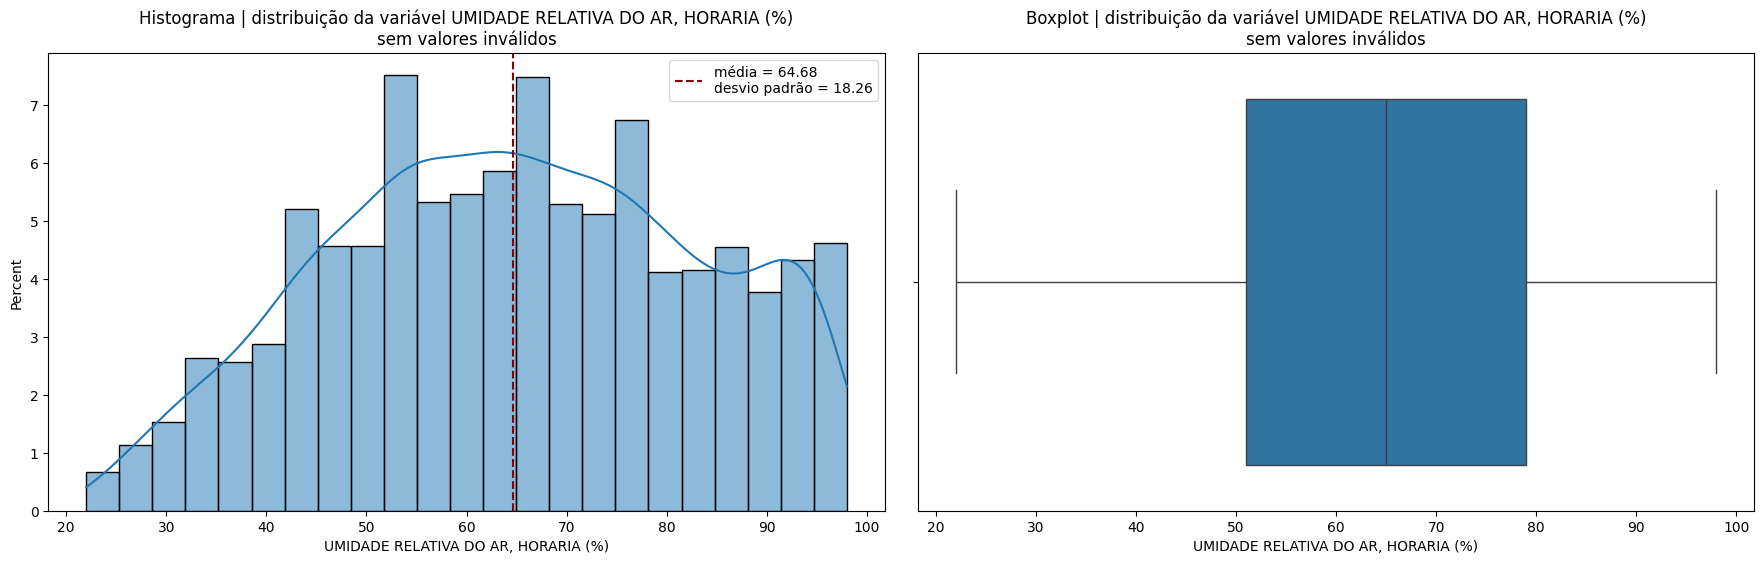

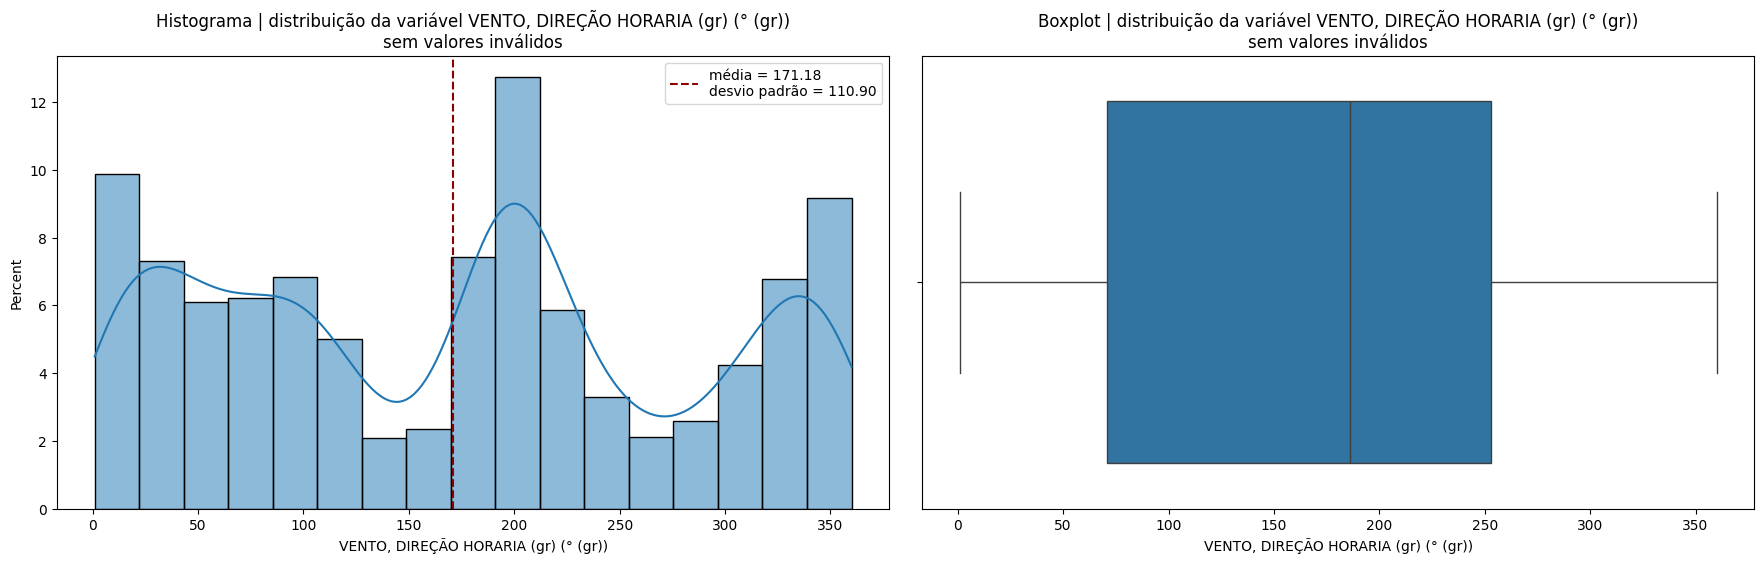

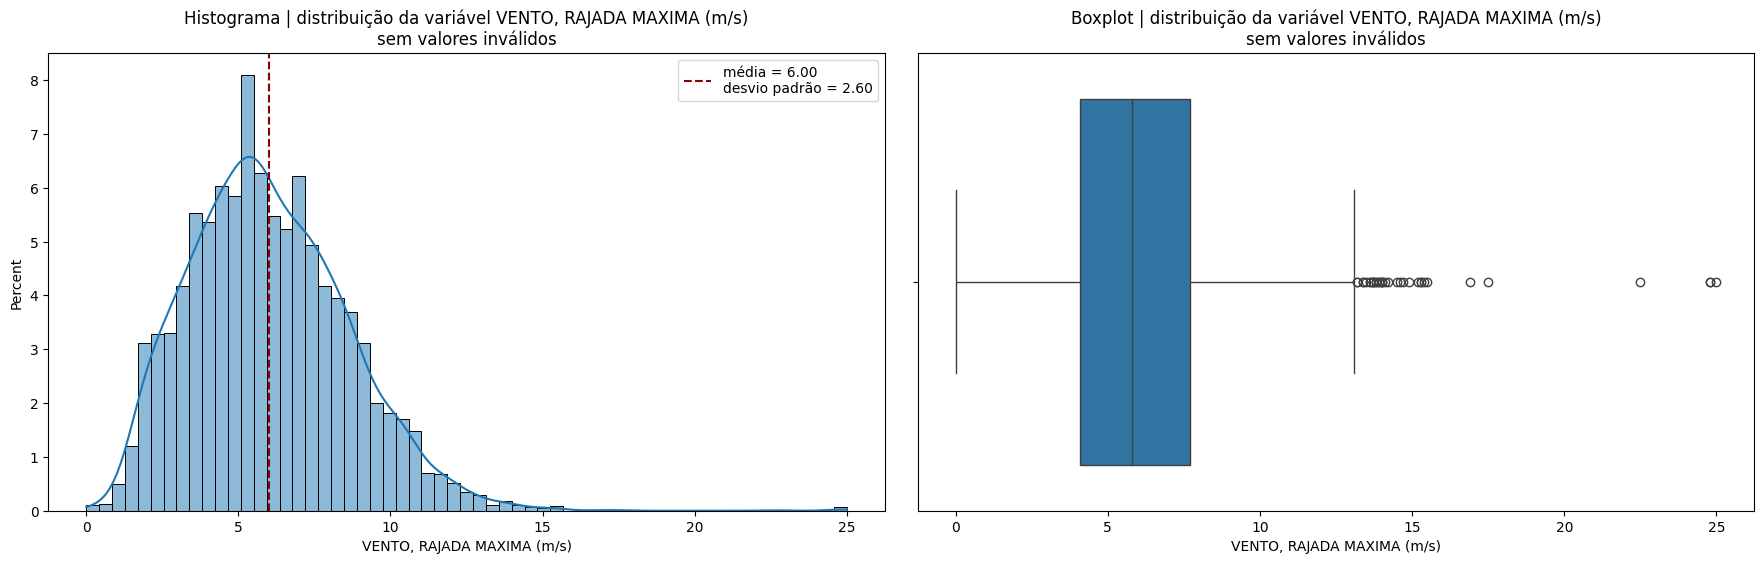

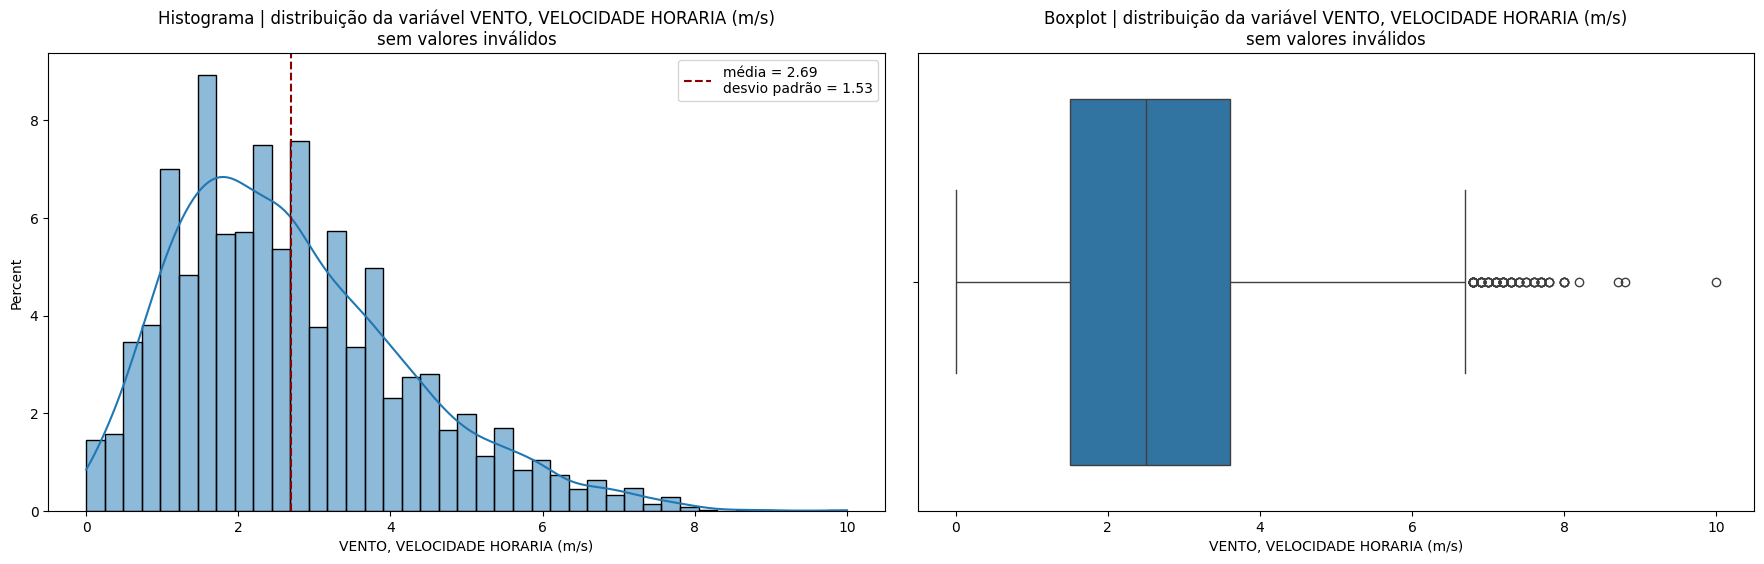

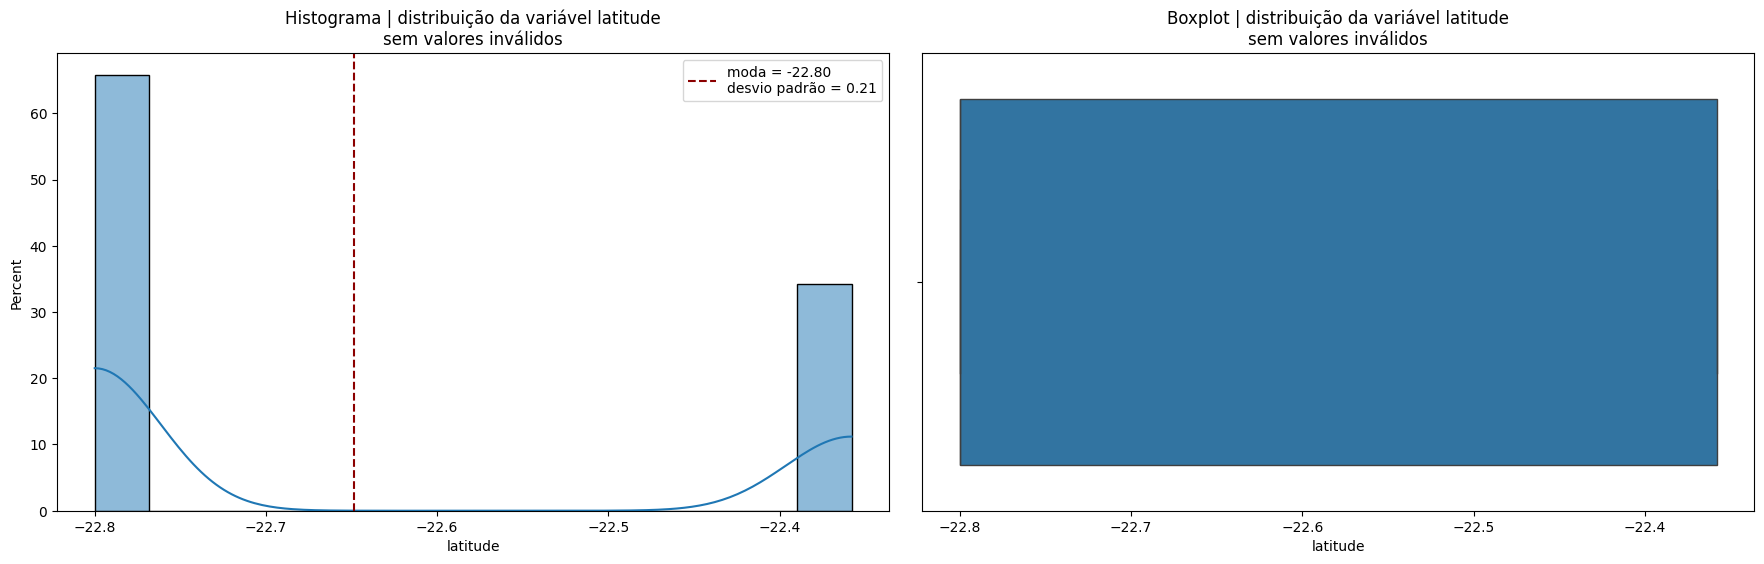

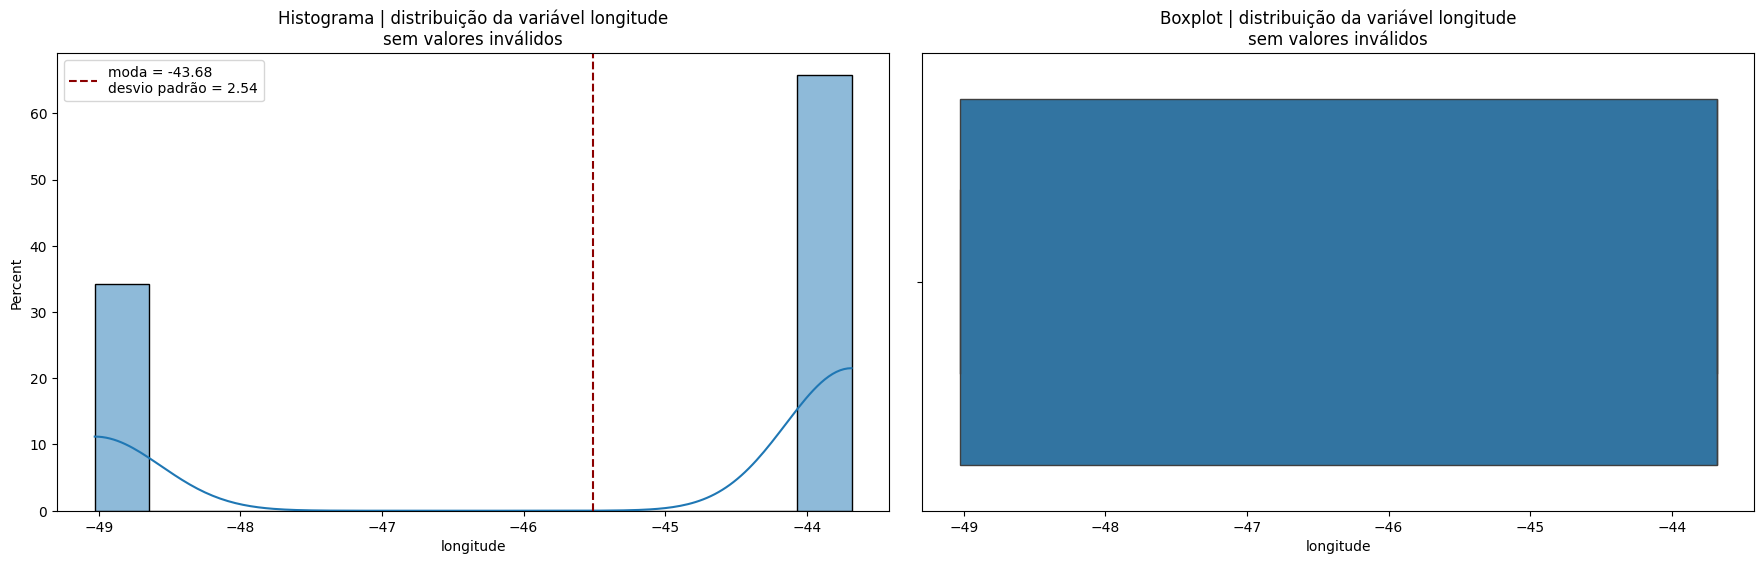

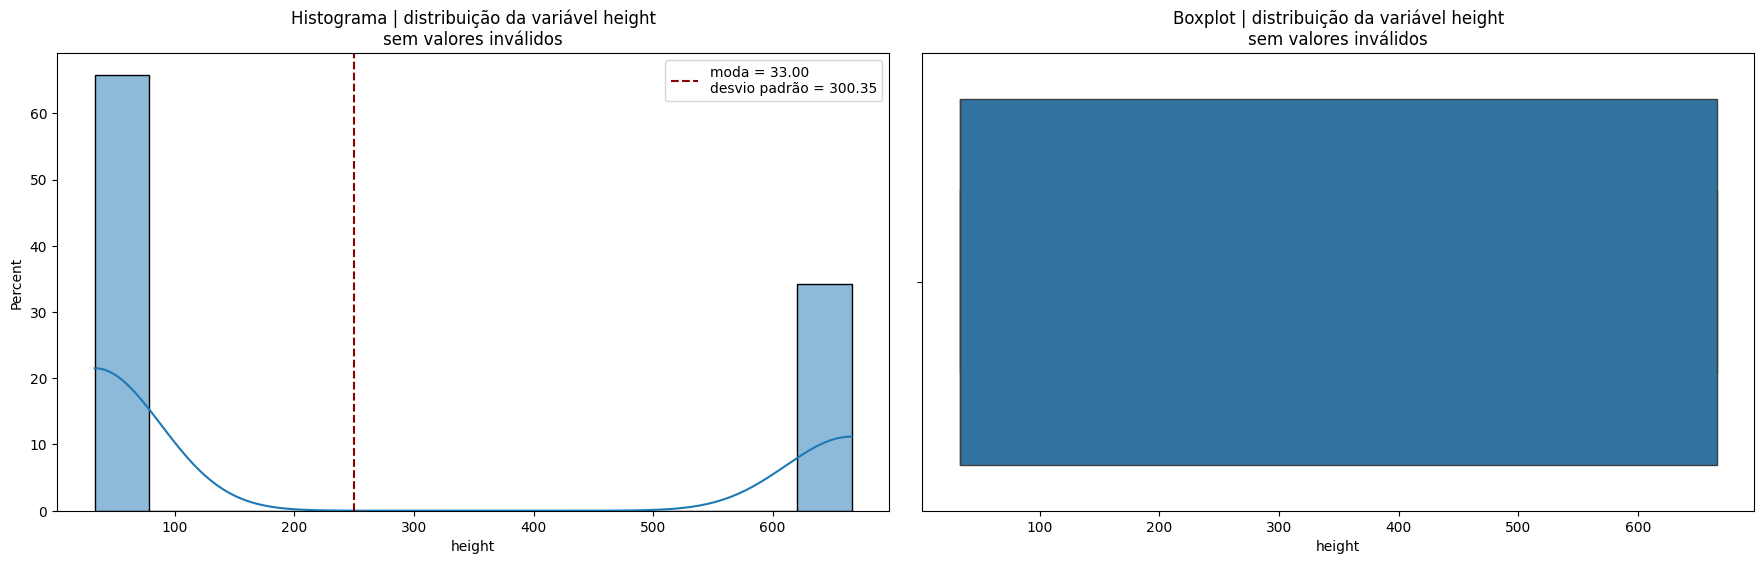

In [29]:
# armazenando os nomes das colunas com os valores inválidos para facilitar o loop
variaveis_numericas = df_numerical.columns

# dicionário com os valores de média e moda
dict_values_mean_mode = {}

# plot da distribuição das variáveis e cálculos de média e moda
for i in range((len(variaveis_numericas))):
    fig1, ax1 = plt.subplots(1, 2, figsize=(18,6))

    if variaveis_numericas[i] in ("latitude", "longitude", "height"):
        # calcula a moda
        dict_values_mean_mode[variaveis_numericas[i]] = df_cleaned[variaveis_numericas[i]].mode()[0]   # selecionar o primeiro valor mais frequente

        # plot do histograma
        sns.histplot(data=df_cleaned, x=variaveis_numericas[i], stat="percent", kde=True, ax=ax1[0])
        ax1[0].axvline(x=df_cleaned[variaveis_numericas[i]].mean(), color="darkred", linestyle="dashed", label=f"moda = {dict_values_mean_mode[variaveis_numericas[i]]:.2f}\ndesvio padrão = {df_cleaned[variaveis_numericas[i]].std():.2f}")
        ax1[0].set_title(f"Histograma | distribuição da variável {variaveis_numericas[i]}\nsem valores inválidos")
        ax1[0].legend()
    
    else:
        # calcula a média
        dict_values_mean_mode[variaveis_numericas[i]] = df_cleaned[variaveis_numericas[i]].mean()

        # plot do histograma
        sns.histplot(data=df_cleaned, x=variaveis_numericas[i], stat="percent", kde=True, ax=ax1[0])
        ax1[0].axvline(x=df_cleaned[variaveis_numericas[i]].mean(), color="darkred", linestyle="dashed", label=f"média = {dict_values_mean_mode[variaveis_numericas[i]]:.2f}\ndesvio padrão = {df_cleaned[variaveis_numericas[i]].std():.2f}")
        ax1[0].set_title(f"Histograma | distribuição da variável {variaveis_numericas[i]}\nsem valores inválidos")
        ax1[0].legend()
    
    # plot do boxplot
    sns.boxplot(data=df_cleaned, x=variaveis_numericas[i], ax=ax1[1])
    ax1[1].set_title(f"Boxplot | distribuição da variável {variaveis_numericas[i]}\nsem valores inválidos")

    plt.tight_layout(pad=2)
    plt.show()

In [30]:
# substituição dos valores inválidos pelas médias e modas
df_filled = copy(df)
for col in variaveis_numericas:
    df_filled[col] = copy(df_filled[col].astype("float64"))
    df_filled.replace({col:-9999.0}, dict_values_mean_mode[col], inplace=True)

In [31]:
count_neg9999_pos_alteracoes = copy(df_filled.isin([-9999]).any(axis=1).sum())
print(f"Número de linhas que contêm valores iguais a -9999 em qualquer coluna pós-substituições: {count_neg9999_pos_alteracoes}")

Número de linhas que contêm valores iguais a -9999 em qualquer coluna pós-substituições: 0


2. Análise de Correlação - Seleção de Atributos

**Questão**: Ao analisar a correlação entre variáveis numéricas e a variável-alvo VENTO, VELOCIDADE HORARIA (m/s), quais atributos apresentam a correlação mais alta? Como essa seleção de atributos poderia influenciar a construção de um modelo preditivo? Justifique a escolha dos atributos a serem mantidos.

**Objetivo**: Identificar os atributos que têm maior influência sobre a variável de interesse, e compreender como a correlação pode ajudar a reduzir a dimensionalidade do problema, mantendo apenas variáveis relevantes.

3. Redução de Dimensionalidade com PCA

**Questão**: Após aplicar PCA ao dataset numérico, os primeiros 6 componentes principais explicam que porcentagem da variância total dos dados? Discuta como a escolha do número de componentes pode impactar o equilíbrio entre a simplificação do modelo e a perda de informação.

**Objetivo:** Analisar a variância explicada por cada componente principal e tomar decisões sobre o número ideal de componentes para representar os dados, considerando a preservação da variabilidade original.

4. Target Encoding em Variáveis Categóricas

**Questão:** Considerando o uso do Target Encoding para a variável type no dataset financeiro, quais seriam as implicações desse método em um modelo preditivo? Como o Target Encoding pode impactar a variabilidade dos dados e o risco de overfitting?

**Objetivo:** Avaliar os prós e contras do Target Encoding, especialmente em relação à sua sensibilidade ao tamanho do dataset e à relação entre as variáveis categóricas e a variável-alvo.

5. Visualização e Interpretação de Dados

**Questão:** A partir da matriz de correlação gerada para as primeiras 10 colunas do dataset, identifique possíveis relações entre variáveis que podem ser exploradas em um modelo preditivo. Como a análise gráfica pode complementar a análise numérica para entender melhor essas relações?

**Objetivo:** Desenvolver a habilidade de interpretar visualizações como mapas de calor de correlação e associar essa interpretação com as decisões de modelagem, como seleção de variáveis e tratamento de multicolinearidade.